In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [106]:
print(f"Shape conjunto treinamento: {x_train.shape}")
print(f"Shape conjunto teste: {x_test.shape}")

Shape conjunto treinamento: (50000, 32, 32, 3)
Shape conjunto teste: (10000, 32, 32, 3)


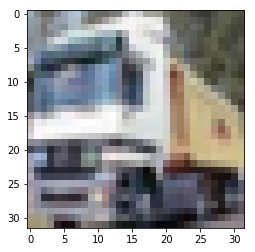

In [107]:
plt.imshow(x_train[1])
print()

In [108]:
print("Classes:")
print(np.unique(y_train))

Classes:
[0 1 2 3 4 5 6 7 8 9]


In [0]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Conv2D, MaxPooling2D
import os

In [0]:
batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [111]:
#to categorical
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print(f"y_train (10 primeiros): {y_train_cat[:10,:]}")
print(f"y_teste (10 primeiros): {y_test_cat[:10,:]}")

y_train (10 primeiros): [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
y_teste (10 primeiros): [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Building Model

In [0]:
model = Sequential()
model.add(layers.Conv2D(20, (3,3), padding='same', activation='relu',  input_shape=x_train.shape[1:]))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(20, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
#model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(40, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
#model.add(layers.Activation('relu')
model.add(layers.Conv2D(40, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
#model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(80, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
#model.add(layers.Activation('relu')
model.add(layers.Conv2D(80, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
#model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 30, 30, 20)        3620      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 20)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 15, 15, 40)        7240      
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 13, 13, 40)        14440     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 40)          0         
__________

In [0]:
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_train_norm /= 255
x_test_norm /= 255

#mean = np.mean(x_train,axis=(0,1,2,3))
#std = np.std(x_train,axis=(0,1,2,3))
#x_train_norm = (x_train-mean)/(std+1e-7)
#x_test_norm = (x_test-mean)/(std+1e-7)



In [115]:
print(y_train_cat.shape)
print(x_train_norm[0,0])

(50000, 10)
[[0.23137255 0.24313726 0.24705882]
 [0.16862746 0.18039216 0.1764706 ]
 [0.19607843 0.1882353  0.16862746]
 [0.26666668 0.21176471 0.16470589]
 [0.38431373 0.28627452 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509807 0.41960785 0.29411766]
 [0.5686275  0.43137255 0.3137255 ]
 [0.58431375 0.45882353 0.34901962]
 [0.58431375 0.47058824 0.3647059 ]
 [0.5137255  0.40392157 0.3019608 ]
 [0.49019608 0.3882353  0.29803923]
 [0.5568628  0.4509804  0.35686275]
 [0.5647059  0.4392157  0.3372549 ]
 [0.5372549  0.4117647  0.30980393]
 [0.5058824  0.38039216 0.2784314 ]
 [0.5372549  0.41568628 0.30980393]
 [0.5254902  0.41568628 0.29803923]
 [0.4862745  0.38039216 0.2509804 ]
 [0.54509807 0.44313726 0.30588236]
 [0.54509807 0.4392157  0.29411766]
 [0.52156866 0.4117647  0.27058825]
 [0.53333336 0.4117647  0.2901961 ]
 [0.54509807 0.42352942 0.3019608 ]
 [0.59607846 0.47058824 0.34901962]
 [0.6392157  0.5137255  0.39215687]
 [0.65882355 0.53333336 0.42352942]
 [0.62352943 0.5

In [0]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

# # Compute quantities required for feature-wise normalization
# # (std, mean, and principal components if ZCA whitening is applied).
# datagen.fit(x_train_norm)

In [145]:
print('Training...')
hist = model.fit(x_train_norm, y_train_cat, batch_size=batch_size, epochs=epochs,validation_data=(x_test_norm, y_test_cat), shuffle=True)
print('Finished')

# Fit the model on the batches generated by datagen.flow().
#hist = model.fit_generator(datagen.flow(x_train_norm, y_train_cat, batch_size=batch_size), epochs=epochs,  steps_per_epoch=x_train_norm.shape[0]//batch_size, validation_data=(x_test_norm, y_test_cat), workers=8)

Training...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 267us/step - loss: 2.2196 - acc: 0.2221 - val_loss: 1.9666 - val_acc: 0.3489
Epoch 2/100
50000/50000 [==============================] - 11s 228us/step - loss: 1.9272 - acc: 0.3381 - val_loss: 1.7765 - val_acc: 0.4033
Epoch 3/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.7715 - acc: 0.3967 - val_loss: 1.6241 - val_acc: 0.4499
Epoch 4/100
50000/50000 [==============================] - 11s 228us/step - loss: 1.6667 - acc: 0.4346 - val_loss: 1.6658 - val_acc: 0.4472
Epoch 5/100
50000/50000 [==============================] - 11s 228us/step - loss: 1.5880 - acc: 0.4665 - val_loss: 1.4696 - val_acc: 0.5096
Epoch 6/100
50000/50000 [==============================] - 12s 230us/step - loss: 1.5159 - acc: 0.4939 - val_loss: 1.4629 - val_acc: 0.5090
Epoch 7/100
50000/50000 [==============================] - 13s 251us/step - loss: 1.4586 - acc: 0.

In [146]:
scores = model.evaluate(x_test_norm, y_test_cat, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.6836674473762512
Test accuracy: 0.8075


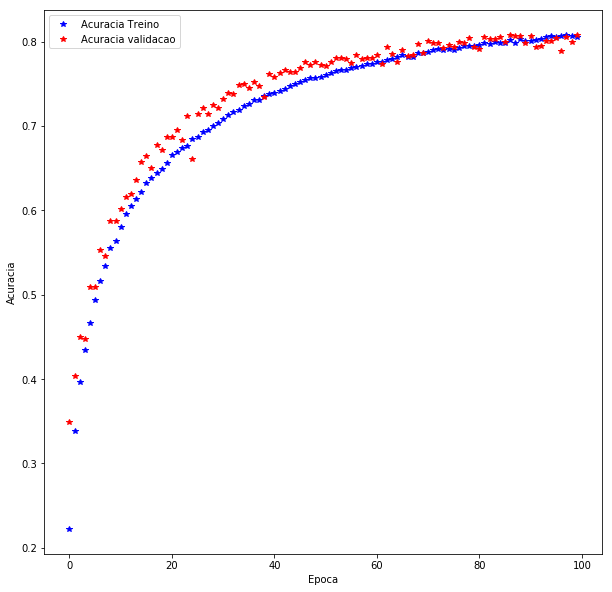

In [147]:
plt.rcParams['figure.figsize'] = 10, 10

acc = hist.history['acc']
acc_val = hist.history['val_acc']
ep = list(range(len(acc)))
plt.plot(ep, acc, '*b', label='Acuracia Treino')
plt.plot(ep, acc_val, '*r', label='Acuracia validacao')
plt.xlabel('Epoca')
plt.ylabel('Acuracia')
plt.legend()
plt.savefig('acc_100.png')

In [0]:
model.save("cifar10_conv_bom.h5")

In [0]:
pred  = model.predict(x_test_norm)

In [0]:
from sklearn.metrics import confusion_matrix




In [0]:
pred_ind = [np.argmax(i) for i in pred]

mt = confusion_matrix(y_test, pred_ind)

In [160]:
mt

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [0]:
classes = np.array(["aviao", "automovel", "passaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhao"])

In [0]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #print(y_true.shape)
    #print(y_pred.shape)
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontweight='bold', fontsize=15)
    
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Label', fontsize=15)
    ax.set_ylabel('Label verdadeiro', fontsize=15)
    ax.set_title(title, fontsize=15)
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[801  17  19  19  26   2   5  21  63  27]
 [  5 923   2   3   3   3   9   2  18  32]
 [ 66   1 605  39  96  63  70  47  11   2]
 [ 14   3  21 629  69 172  38  38  10   6]
 [  8   1  18  27 854  15  33  37   6   1]
 [  3   2  13 125  37 732  15  70   1   2]
 [  2   2  10  40  24  17 896   6   3   0]
 [  8   0   4  22  52  36   2 873   0   3]
 [ 42  23   2  10   3   2   4   4 896  14]
 [ 18  55   2  11   7   2   7   9  23 866]]


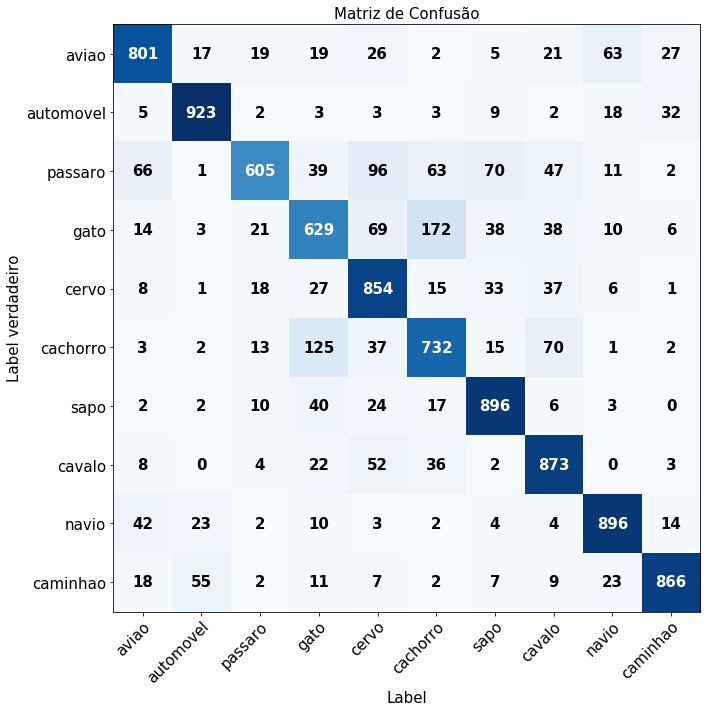

In [166]:
plot_confusion_matrix(y_test, pred_ind, classes=classes, title='Matriz de Confusão')
plt.savefig("fig_10_confMatrix_rede.png", dpi=320)
plt.show()